In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
#Linear PCA
from sklearn.decomposition import PCA
lin_pca = PCA()

In [6]:
import numpy as np
X_centered = X - np.mean(X,axis = 0)

In [7]:
U,s,V = np.linalg.svd(X_centered)

In [12]:
np.where(np.cumsum((s/np.sum(s)))>=0.9)[0][0]

2

In [14]:
np.cumsum(s/np.sum(s))

array([0.68934513, 0.85449016, 0.94824346, 1.        ])

In [15]:
#capture only 85% of variance
lin_pca_final = PCA(n_components = 2)
X_reduced = lin_pca_final.fit_transform(X)

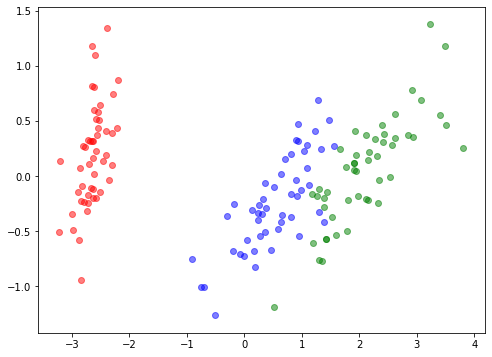

In [19]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax.scatter(X_reduced[y == 0,0],X_reduced[y == 0,1],color = 'red',alpha = 0.5)
ax.scatter(X_reduced[y == 1,0],X_reduced[y == 1,1],color = 'blue',alpha = 0.5)
ax.scatter(X_reduced[y == 2,0],X_reduced[y == 2,1],color = 'green',alpha = 0.5)


<h3> Kernel PCA </h3>

In [25]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from scipy import exp

In [26]:
sq_dists = pdist(X,'sqeuclidean')
mat_sq_dists = squareform(sq_dists)
#RBF kernel
K = exp(-0.04*(mat_sq_dists))
#centering K
N = K.shape[0]
one_n = np.ones((N,N))/N
K = K - one_n.dot(K) - K.dot(one_n) +(one_n.dot(K)).dot(one_n)

eigvals,eigvecs = eigh(K)

In [30]:
X_reduced_rbf = eigvecs[:,-2:]
X_reduced_rbf

array([[-0.04186074, -0.1108721 ],
       [-0.02190485, -0.11066698],
       [-0.03840396, -0.11518369],
       [-0.01932767, -0.11107159],
       [-0.04616687, -0.11197005],
       [-0.03411278, -0.09824562],
       [-0.0362245 , -0.11349364],
       [-0.03002022, -0.10928349],
       [-0.02164874, -0.1129703 ],
       [-0.02096343, -0.10984595],
       [-0.0440861 , -0.10550114],
       [-0.02276336, -0.10858094],
       [-0.02539167, -0.11228651],
       [-0.0532536 , -0.11990841],
       [-0.08054549, -0.10659952],
       [-0.073541  , -0.09834357],
       [-0.06204514, -0.10801918],
       [-0.0390312 , -0.1099055 ],
       [-0.03462491, -0.09520712],
       [-0.0448857 , -0.10790195],
       [-0.01625929, -0.0997273 ],
       [-0.03767182, -0.10679583],
       [-0.07781347, -0.12182   ],
       [-0.00220843, -0.09947912],
       [-0.00023736, -0.10064103],
       [-0.00594594, -0.10506928],
       [-0.01670164, -0.10473306],
       [-0.03449098, -0.10752862],
       [-0.03772762,

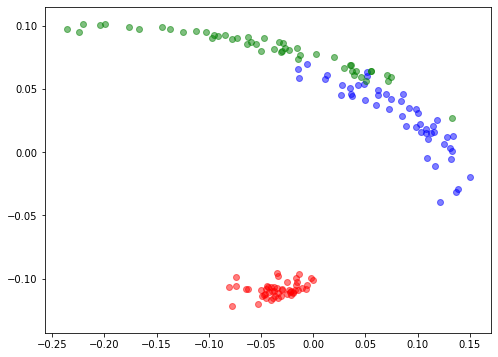

In [31]:
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots(1,1,figsize = (8,6))
ax1.scatter(X_reduced_rbf[y == 0,0],X_reduced_rbf[y == 0,1],color = 'red',alpha = 0.5)
ax1.scatter(X_reduced_rbf[y == 1,0],X_reduced_rbf[y == 1,1],color = 'blue',alpha = 0.5)
ax1.scatter(X_reduced_rbf[y == 2,0],X_reduced_rbf[y == 2,1],color = 'green',alpha = 0.5)